_逼近法_

回归和插值是金融学中最常用的数学技术

_凸优化_

一些金融学需要凸优化工具（例如，期权定价模型检验）

_积分_

金融（衍生）资产的估值往往归结为积分计算

_符号数学_

Python提供Sympy，是一种强大的符号数学工具

# 逼近法

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x)+0.5*x

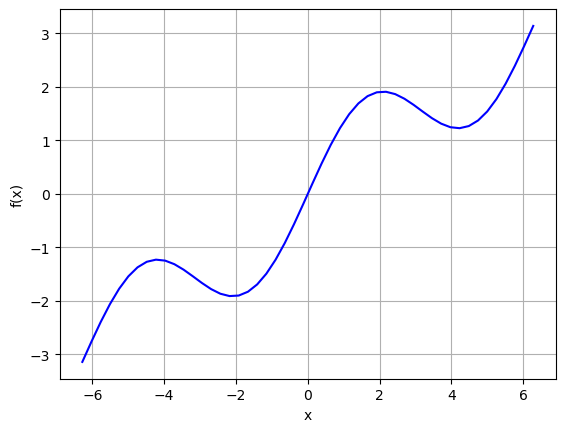

In [3]:
x=np.linspace(-2*np.pi,2*np.pi,50)
plt.plot(x,f(x),'b')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

# 回归

numpy的ployfit函数参数

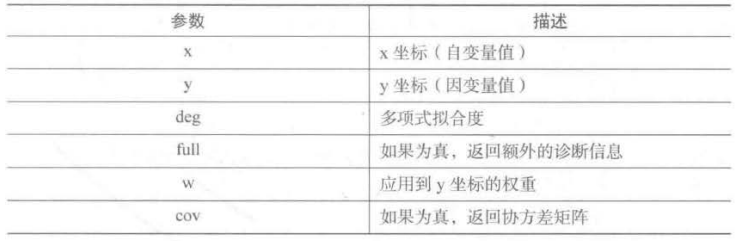

Text(0, 0.5, 'f(x)')

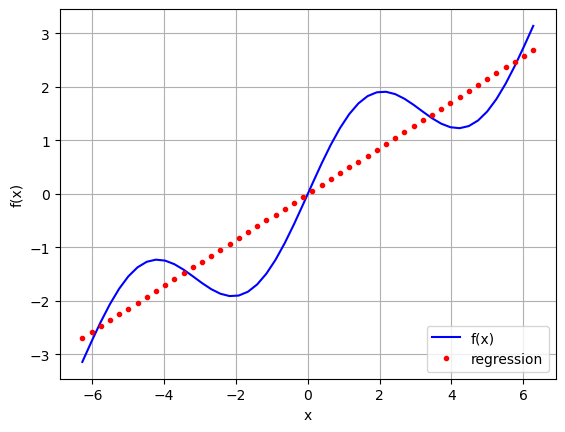

In [11]:
reg=np.polyfit(x,f(x),deg=1)
ry=np.polyval(reg,x)
plt.plot(x,f(x),'b',label='f(x)')
plt.plot(x,ry,'r.',label='regression')
plt.legend(loc=4)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

Text(0, 0.5, 'f(x)')

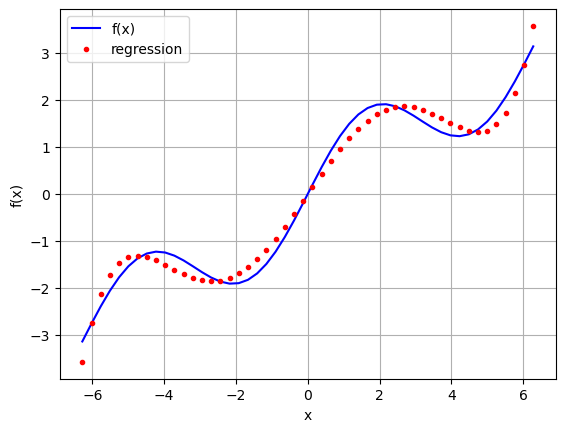

In [13]:
reg=np.polyfit(x,f(x),deg=5)
ry=np.polyval(reg,x)

plt.plot(x,f(x),'b',label='f(x)')
plt.plot(x,ry,'r.',label="regression")
plt.grid(True)
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')

**单独的基函数**

In [15]:
matrix=np.zeros((4,len(x)))
matrix[3,:]=x**3
matrix[2,:]=x**2
matrix[1,:]=x
matrix[0,:]=1
reg=np.linalg.lstsq(matrix.T,f(x))[0]

C:\Users\15295\AppData\Local\Temp\ipykernel_12316\2100428742.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg=np.linalg.lstsq(matrix.T,f(x))[0]


In [16]:
reg

array([ 1.47064660e-14,  5.62777448e-01, -1.11022302e-15, -5.43553615e-03])

**有噪声的数据**


In [17]:
xn=np.linspace(-2*np.pi,2*np.pi,50)
xn=xn+0.15*np.random.standard_normal(len(xn))
yn=f(xn)+0.25*np.random.standard_normal(len(xn))


In [19]:
reg=np.polyfit(xn,yn,7)
ry=np.polyval(reg,xn)

Text(0, 0.5, 'f(x)')

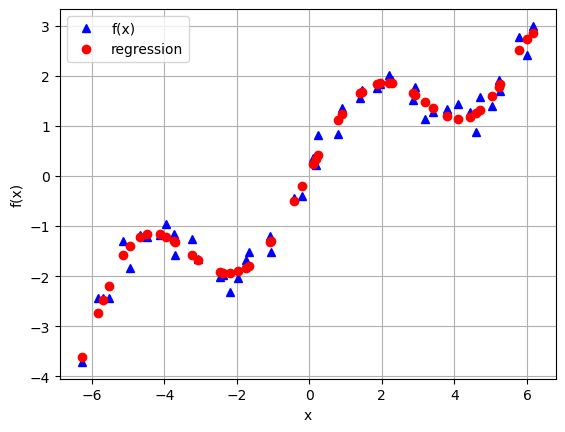

In [20]:
plt.plot(xn,yn,'b^',label='f(x)')
plt.plot(xn,ry,'ro',label='regression')
plt.grid(True)
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')

**未排序数据**

In [21]:
xu=np.random.rand(50)*4*np.pi-2*np.pi
yu=f(xu)


In [22]:
print(xu[:10].round(2))
print(yu[:10].round(2))

[-3.29  1.32  2.47  4.73 -1.51 -2.5  -0.82  2.05 -4.83  3.83]
[-1.5   1.63  1.86  1.37 -1.75 -1.85 -1.14  1.91 -1.42  1.28]


In [23]:
reg=np.polyfit(xu,yu,5)
ry=np.polyval(reg,xu)

Text(0, 0.5, 'f(x)')

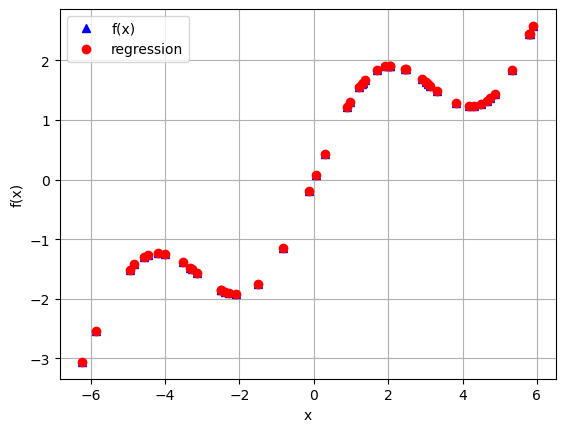

In [24]:
plt.plot(xu,yu,'b^',label='f(x)')
plt.plot(xu,f(xu),'ro',label='regression')
plt.grid(True)
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')

**多维**

In [26]:
def fm(x,y):
    return np.sin(x)+0.25*x+np.sqrt(y)+0.05*y**2

x=np.linspace(0,10,20)
y=np.linspace(0,10,20)
X,Y=np.meshgrid(x,y)

Z=fm(X,Y)
x=X.flatten()
y=Y.flatten()



C:\Users\15295\AppData\Local\Temp\ipykernel_12316\2242225474.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax=fig.gca(projection='3d')


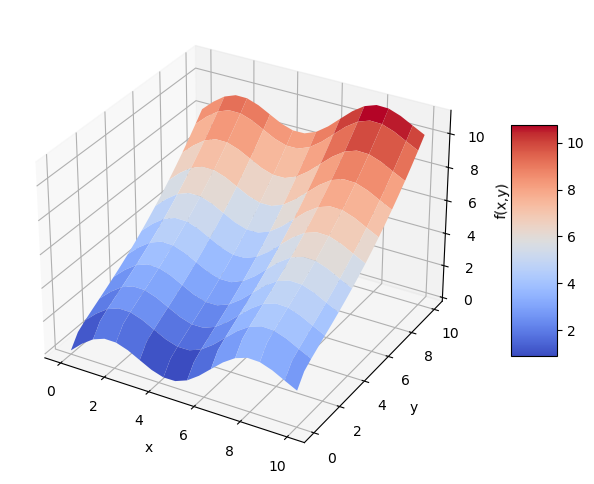

In [31]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

fig=plt.figure(figsize=(10,6))
ax=fig.gca(projection='3d')
surf=ax.plot_surface(X,Y,Z,rstride=2,cstride=2,cmap=mpl.cm.coolwarm)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
fig.colorbar(surf,shrink=0.5,aspect=5)

# 插值

In [32]:
import scipy.interpolate as spi
x=np.linspace(-2*np.pi,2*np.pi,25)

def f(x):
    return np.sin(x)+0.5*x

ipo=spi.splrep(x,f(x),k=1)
iy=spi.splev(x,ipo)

Text(0, 0.5, 'f(x)')

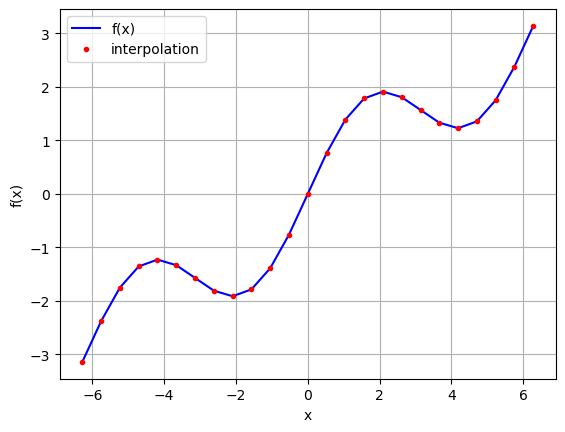

In [33]:
plt.plot(x,f(x),'b',label='f(x)')
plt.plot(x,iy,'r.',label='interpolation')
plt.legend()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [34]:
np.allclose(f(x),iy)

True

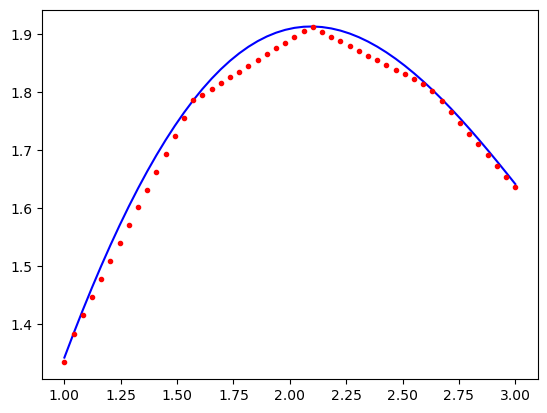

In [37]:
xd=np.linspace(1,3,50)
iyd=spi.splev(xd,ipo)
plt.plot(xd,f(xd),'b',label='f(x)')
plt.plot(xd,iyd,'r.',label='interpolation')


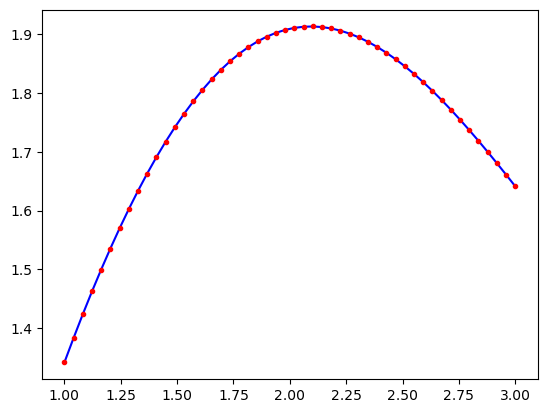

In [38]:
#三次样条插值
ipo=spi.splrep(x,f(x),k=3)
iyd=spi.splev(xd,ipo)


plt.plot(xd,f(xd),'b',label='f(x)')
plt.plot(xd,iyd,'r.',label='interpolation')


# 凸优化

C:\Users\15295\AppData\Local\Temp\ipykernel_12316\2845248535.py:10: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax=fig.gca(projection='3d')


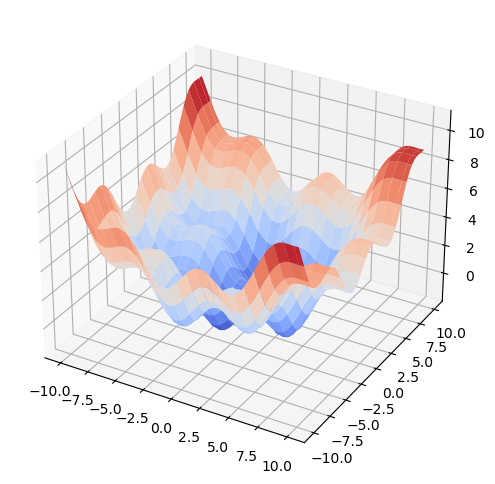

In [40]:
def fm(x,y):
    return (np.sin(x)+0.05*x**2+np.sin(y)+0.05*y**2)
x=np.linspace(-10,10,50)
y=np.linspace(-10,10,50)

X,Y=np.meshgrid(x,y)
Z=fm(X,Y)

fig=plt.figure(figsize=(8,6))
ax=fig.gca(projection='3d')
surf=ax.plot_surface(X,Y,Z,rstride=2,cstride=2,cmap=mpl.cm.coolwarm,linewidth=0.5,antialiased=True)


**全局优化**

In [72]:
import scipy.optimize as spo
def fo(xy):
    x,y=xy
    z=np.sin(x)+0.05*x**2+np.sin(y)+0.05*y**2
    if output == True:
        print('%.4f %.4f %.4f '%(x,y,z))
    return z

output=True
spo.brute(fo,(slice(-10,10.1,5),slice(-10,10.1,5)),finish=None)
output=False
opt1=spo.brute(fo,(slice(-10,10.1,0.1),slice(-10,10.1,0.1)),finish=None)
opt1


-10.0000 -10.0000 11.0880 
-10.0000 -5.0000 7.7529 
-10.0000 0.0000 5.5440 
-10.0000 5.0000 5.8351 
-10.0000 10.0000 10.0000 
-5.0000 -10.0000 7.7529 
-5.0000 -5.0000 4.4178 
-5.0000 0.0000 2.2089 
-5.0000 5.0000 2.5000 
-5.0000 10.0000 6.6649 
0.0000 -10.0000 5.5440 
0.0000 -5.0000 2.2089 
0.0000 0.0000 0.0000 
0.0000 5.0000 0.2911 
0.0000 10.0000 4.4560 
5.0000 -10.0000 5.8351 
5.0000 -5.0000 2.5000 
5.0000 0.0000 0.2911 
5.0000 5.0000 0.5822 
5.0000 10.0000 4.7471 
10.0000 -10.0000 10.0000 
10.0000 -5.0000 6.6649 
10.0000 0.0000 4.4560 
10.0000 5.0000 4.7471 
10.0000 10.0000 8.9120 


array([-1.4, -1.4])

**局部优化**

In [73]:
output=True
opt2=spo.fmin(fo,opt1,xtol=0.001,ftol=0.001,maxiter=15,maxfun=20)
opt2

-1.4000 -1.4000 -1.7749 
-1.4700 -1.4000 -1.7743 
-1.4000 -1.4700 -1.7743 
-1.3300 -1.4700 -1.7696 
-1.4350 -1.4175 -1.7756 
-1.4350 -1.3475 -1.7722 
-1.4088 -1.4394 -1.7755 
-1.4438 -1.4569 -1.7751 
-1.4328 -1.4427 -1.7756 
-1.4591 -1.4208 -1.7752 
-1.4213 -1.4347 -1.7757 
-1.4235 -1.4096 -1.7755 
-1.4305 -1.4344 -1.7757 
-1.4168 -1.4516 -1.7753 
-1.4305 -1.4260 -1.7757 
-1.4396 -1.4257 -1.7756 
-1.4259 -1.4325 -1.7757 
-1.4259 -1.4241 -1.7757 
-1.4304 -1.4177 -1.7757 
-1.4270 -1.4288 -1.7757 


C:\Users\15295\AppData\Local\Temp\ipykernel_12316\989667285.py:2: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  opt2=spo.fmin(fo,opt1,xtol=0.001,ftol=0.001,maxiter=15,maxfun=20)


array([-1.42702972, -1.42876755])

在许多凸优化问题中，尽量在局部优化前进行全局优化，主要原因是局部凸优化算法容易陷入局部最小值

In [74]:
output=False
spo.fmin(fo,(2,2),maxiter=250)

Optimization terminated successfully.
         Current function value: 0.015826
         Iterations: 46
         Function evaluations: 86


array([4.2710728 , 4.27106945])

**有约束优化**

考虑投资两种高风险证券的投资者的效用最大化问题。两种证券今天价格为$q_{a}=q_{b}=10$。一年之后，状态u下它们的收益分别为15美元和5美元，而在状态d下收益分别为5美元和12美元，两种状态的出现可能性相同，两种证券的向量化收益分别为$r_{a}和r_{b}$

投资者的投资预算为$w_{0}=100$美元，并根据效用函数$u(w)=\sqrt{w}$得出未来的财富效率，其中w是可用的财务（美元计算），下面公式是最优化的公式，其中a,b是投资者购买的证券数量

**预期效用最大化问题**
$$
max_{a,b} E(u(w_{l}))=p\sqrt{w_{lu}}+(1-p)\sqrt{w_{ld}}
$$
$$
w_{l}=ar_{a}+br_{b}
$$
$$
w_{0}>aq_{a}+bq_{b}
$$
$$
a,b>0
$$




In [81]:
from math import sqrt
def Eu(x):
    return -(0.5*sqrt(x[0]*15+x[1]*5)+0.5*sqrt(x[0]*5+x[1]*12))

cons=({'type':'ineq','fun':lambda x:100-x[0]*10-x[1]*10})
bnds=((0,1000),(0,1000))

result=spo.minimize(Eu,[5,5],method='SLSQP',bounds=bnds,constraints=cons)
result

     fun: -9.700883611487832
     jac: array([-0.48508096, -0.48489535])
 message: 'Optimization terminated successfully'
    nfev: 16
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([8.02547122, 1.97452878])

# 积分

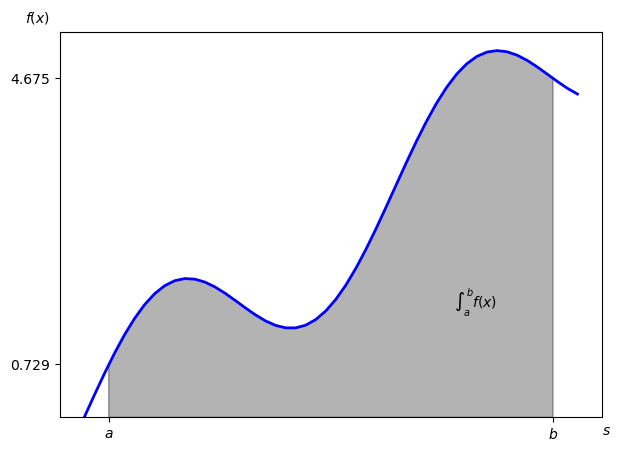

In [4]:
import scipy.integrate as sci
import numpy as np

def f(x):
    return np.sin(x)+0.5*x
a=0.5
b=9.5
x=np.linspace(0,10)
y=f(x)



from matplotlib.patches import Polygon
fig,ax=plt.subplots(figsize=(7,5))
plt.plot(x,y,'b',lw=2)
plt.ylim(ymin=0)
#画阴影部分
Ix=np.linspace(a,b)
Iy=f(Ix)
verts=[(a,0)]+list(zip(Ix,Iy))+[(b,0)]
poly=Polygon(verts,facecolor='0.7',edgecolor='0.5')
ax.add_patch(poly)

plt.text(0.75*(a+b),1.5,r'$\int_a^b f(x)$')
plt.figtext(0.9,0.075,'$s$')
plt.figtext(0.075,0.9,'$f(x)$')

ax.set_xticks((a,b))
ax.set_xticklabels(('$a$','$b$'))
ax.set_yticks([f(a),f(b)])


In [5]:
#用于高斯求积的fixed_quad
sci.fixed_quad(f,a,b)[0]

24.366995967084602

In [6]:
#用于自适应求积的quad
sci.quad(f,a,b)

(24.374754718086752, 2.706141390761058e-13)

In [7]:
sci.romberg(f,a,b)

24.374754718086713

In [9]:
for i in range(1,20):
    np.random.seed(1000)
    x=np.random.random(i*10)*(b-a)+a
    print(np.sum(f(x))/len(x)*(b-a))

24.804762279331463
26.522918898332378
26.265547519223976
26.02770339943824
24.99954181440844
23.881810141621663
23.527912274843253
23.507857658961207
23.67236746066989
23.679410416062886
24.424401707879305
24.239005346819056
24.115396924962802
24.424191987566726
23.924933080533783
24.19484212027875
24.117348378249833
24.100690929662274
23.76905109847816
